# [ATM 623: Climate Modeling](../index.ipynb)
[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany
# Lecture 18: Snowball Earth in the EBM

## Contents

1. [First section title](#section1)

____________
<a id='section1'></a>

## 1. First section title
____________


Here we will use the 1-dimensional diffusive Energy Balance Model (EBM) to explore the effects of albedo feedback and heat transport on climate sensitivity.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from climlab import constants as const
import climlab
#from climlab import legendre
#from climlab.domain.field import global_mean

## Annual-mean model with albedo feedback: adjustment to equilibrium

The default version of the EBM lets the albedo adjust to the current position of the ice line, wherever $T < T_f$

In [2]:
#  for convenience, set up a dictionary with our reference parameters
param = {'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'Tf':-10., 'D':0.55}
model1 = climlab.EBM_annual( num_lat=180, **param )
print model1

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
top: <class 'climlab.model.ebm.EBM_annual'>
   diffusion: <class 'climlab.dynamics.diffusion.MeridionalDiffusion'>
   LW: <class 'climlab.radiation.AplusBT.AplusBT'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>



In [3]:
model1.integrate_years(5)
Tequil = np.array(model1.state['Ts'])
ALBequil = np.array(model1.diagnostics['albedo'])
OLRequil = np.array(model1.diagnostics['OLR'])
ASRequil = np.array(model1.diagnostics['ASR'])

Integrating for 450 steps, 1826.211 days, or 5 years.
Total elapsed time is 5.0 years.


Let's look at what happens if we perturb the temperature -- make it 20ºC colder everywhere!

In [4]:
model1.state['Ts'] -= 20.
model1.compute_diagnostics()

Let's take a look at how we have just perturbed the absorbed shortwave:

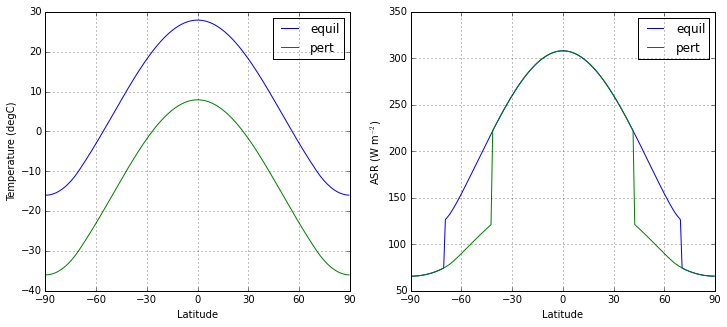

In [5]:
my_ticks = [-90,-60,-30,0,30,60,90]
lat = model1.lat

fig = plt.figure( figsize=(12,5) )

ax1 = fig.add_subplot(1,2,1)
ax1.plot(lat, Tequil, label='equil') 
ax1.plot(lat, model1.state['Ts'], label='pert' )
ax1.grid()
ax1.legend()
ax1.set_xlim(-90,90)
ax1.set_xticks(my_ticks)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Temperature (degC)')

ax2 = fig.add_subplot(1,2,2)
ax2.plot( lat, ASRequil, label='equil') 
ax2.plot( lat, model1.diagnostics['ASR'], label='pert' )
ax2.grid()
ax2.legend()
ax2.set_xlim(-90,90)
ax2.set_xticks(my_ticks)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('ASR (W m$^{-2}$)')

plt.show()

So there is less absorbed shortwave now, because of the increased albedo. The global mean difference is:

In [6]:
climlab.global_mean( model1.diagnostics['ASR'] - ASRequil )

Field(-20.374400181491197)

Less shortwave means that there is a tendency for the climate to cool down even more! In other words, the shortwave feedback is **positive**.

###  Global feedback analysis in the EBM

Take the global mean of the EBM equation, the transport term drops out

$$ C \frac{\partial \langle T_s \rangle}{\partial t} = \langle (1-\alpha) ~ Q \rangle - ~A - B~\langle T_s \rangle $$


Way back in Lecture 3 we defined the net climate feedback through a linear Taylor series expansion of the global energy budget:

$$ \lambda = \frac{\partial}{\partial \langle T_s \rangle} \bigg( \Delta F_{TOA} \bigg) $$

where $\Delta F_{TOA}$ is the change in the net downward radiative flux at the TOA associated with a change $\delta \langle T_s \rangle$ in the global average surface temperature.

Applying this to the RHS of our EBM equation gives

$$ \lambda = \lambda_{LW} + \lambda_{SW} $$

with longwave and shortwave contributions:

$$ \lambda_{LW} = -B $$

and 

$$ \lambda_{SW} = \frac{\Delta \langle (1-\alpha) ~ Q \rangle}{\Delta \langle T_s \rangle} $$

The longwave feedback is a constant in our model, by contruction.

The shortwave feedback, on the other hand, is **state-dependent**. The feedback depends on the detailed displacement of the ice line for a given global temperature change.

Plugging in numbers from our example above gives

$\lambda = - 2 + \frac{-20.4}{-20} = -2 + 1 = -1$ W m$^{-2}$ $^{\circ}$C$^{-1}$

The feedback is negative, as we expect! The tendency to warm up from reduced OLR outweighs the tendency to cool down from reduced ASR. A negative net feedback means that the system will relax back towards the equilibrium.

Let's let the temperature evolve one year at a time and add extra lines to the graph:

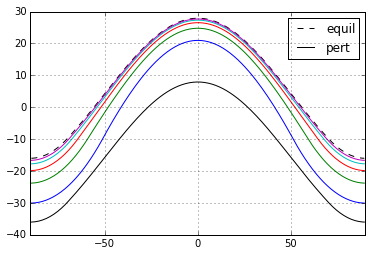

In [7]:
plt.plot( lat, Tequil, 'k--', label='equil' )
plt.plot( lat, model1.state['Ts'], 'k-', label='pert' )
plt.grid()
plt.xlim(-90,90)
plt.legend()

for n in range(5):
    model1.integrate_years(years=1.0, verbose=False)
    plt.plot(lat, model1.state['Ts'])

Temperature drifts back towards equilibrium, as we expected!

What if we cool the climate **so much** that the entire planet is ice covered?

In [8]:
model1.state['Ts'] -= 40.
model1.compute_diagnostics()

Look again at the change in absorbed shortwave:

In [9]:
climlab.global_mean( model1.diagnostics['ASR'] - ASRequil )

Field(-108.99364172844652)

It's much larger because we've covered so much more surface area with ice!

The feedback calculation now looks like

$\lambda = - 2 + \frac{-109}{-40} = -2 + 2.7 = +0.7$ W m$^{-2}$ $^{\circ}$C$^{-1}$

What? Looks like the **positive** albedo feedback is so strong here that it has outweighed the **negative** longwave feedback. What will happen to the system now? Let's find out...

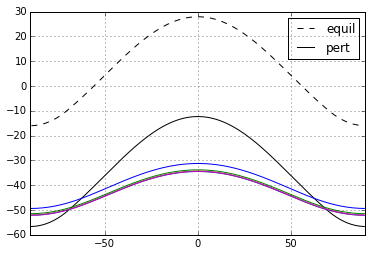

In [10]:
plt.plot( lat, Tequil, 'k--', label='equil' )
plt.plot( lat, model1.state['Ts'], 'k-', label='pert' )
plt.grid()
plt.xlim(-90,90)
plt.legend()

for n in range(5):
    model1.integrate_years(years=1.0, verbose=False)
    plt.plot(lat, model1.state['Ts'])

Something **very different** happened! The climate drifted towards an entirely different equilibrium state, in which the entire planet is cold and ice-covered.

We will refer to this as the **SNOWBALL EARTH**.

Note that the warmest spot on the planet is still the equator, but it is now about -33ºC rather than +28ºC!

## Here Comes the Sun! Where is the ice edge?

The ice edge in our model is always where the temperature crosses $T_f = -10^\circ$C. The system is at **equilibrium** when the temperature is such that there is a balance between ASR, OLR, and heat transport convergence everywhere. 

Suppose that sun was hotter or cooler at different times (in fact it was significantly cooler during early Earth history). That would mean that the solar constant $S_0 = 4Q$ was larger or smaller. We should expect that the temperature (and thus the ice edge) should increase and decrease as we change $S_0$. 

$S_0$ during the Neoproterozoic Snowball Earth events is believed to be about 93% of its present-day value, or about 1270 W m$^{-2}$.

We are going to look at how the **equilibrium** ice edge depends on $S_0$, by integrating the model out to equilibrium for lots of different values of $S_0$. We will start by slowly decreasing $S_0$, and then slowly increasing $S_0$.

In [11]:
model2 = climlab.EBM_annual(num_lat = 360, **param)

In [12]:
S0array = np.linspace(1400., 1200., 200.)
#S0array = np.linspace(1400., 1200., 10.)
#print S0array

In [13]:
model2.integrate_years(5)

Integrating for 450 steps, 1826.211 days, or 5 years.
Total elapsed time is 5.0 years.


In [14]:
print model2.diagnostics['icelat']

[-71.  71.]


In [15]:
icelat_cooling = np.empty_like(S0array)
icelat_warming = np.empty_like(S0array)

In [16]:
# First cool....
for n in range(S0array.size):
    model2.subprocess['insolation'].S0 = S0array[n]
    model2.integrate_years(10, verbose=False)
    icelat_cooling[n] = np.max(model2.diagnostics['icelat'])
# Then warm...
for n in range(S0array.size):
    model2.subprocess['insolation'].S0 = np.flipud(S0array)[n]
    model2.integrate_years(10, verbose=False)
    icelat_warming[n] = np.max(model2.diagnostics['icelat'])

For completeness: also start from present-day conditions and warm up.

In [17]:
model3 = climlab.EBM_annual(num_lat=360, **param)
S0array3 = np.linspace(1350., 1400., 50.)
#S0array3 = np.linspace(1350., 1400., 5.)
icelat3 = np.empty_like(S0array3)

In [18]:
for n in range(S0array3.size):
    model3.subprocess['insolation'].S0 = S0array3[n]
    model3.integrate_years(10, verbose=False)
    icelat3[n] = np.max(model3.diagnostics['icelat'])

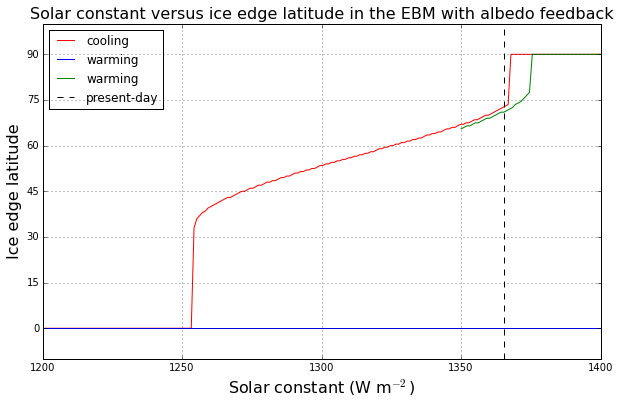

In [19]:
fig = plt.figure( figsize=(10,6) )
ax = fig.add_subplot(111)
ax.plot(S0array, icelat_cooling, 'r-', label='cooling' )
ax.plot(S0array, icelat_warming, 'b-', label='warming' )
ax.plot(S0array3, icelat3, 'g-', label='warming' )
ax.set_ylim(-10,100)
ax.set_yticks((0,15,30,45,60,75,90))
ax.grid()
ax.set_ylabel('Ice edge latitude', fontsize=16)
ax.set_xlabel('Solar constant (W m$^{-2}$)', fontsize=16)
ax.plot( [const.S0, const.S0], [-10, 100], 'k--', label='present-day' )
ax.legend(loc='upper left')
ax.set_title('Solar constant versus ice edge latitude in the EBM with albedo feedback', fontsize=16)
plt.show()

There are actually up to 3 different climates possible for a given value of $S_0$!

### How to un-freeze the Snowball

The graph indicates that if the Earth were completely frozen over, it would be perfectly happy to stay that way even if the sun were brighter and hotter than it is today.

Our EBM predicts that (with present-day parameters) the equilibrium temperature at the equator in the Snowball state is about -33ºC, which is much colder than the threshold temperature $T_f = -10^\circ$C. How can we melt the Snowball?

We need to increase the avaible energy sufficiently to get the equatorial temperatures above this threshold! That is going to require a much larger increase in $S_0$ (could also increase the greenhouse gases, which would have a similar effect)!

Let's crank up the sun to 1830 W m$^{-2}$ (about a 35% increase from present-day).

Integrating for 3600 steps, 14609.688 days, or 40 years.
Total elapsed time is 4201.36666664 years.


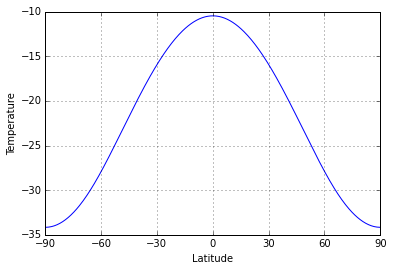

The ice edge is at [-0.  0.]degrees latitude.


In [24]:
model4 = climlab.process_like(model2)  # initialize with cold Snowball temperature
model4.subprocess['insolation'].S0 = 1830.
model4.integrate_years(40)

plt.plot(model4.lat, model4.state['Ts'])
plt.xlim(-90,90)
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.grid()
plt.xticks(my_ticks)
plt.show()

print('The ice edge is at ' + str(model4.diagnostics['icelat']) + ' degrees latitude.' )

Still a Snowball... but just barely! The temperature at the equator is just below the threshold.

Try to imagine what might happen once it starts to melt. The solar constant is huge, and if it weren't for the highly reflective ice and snow, the climate would be really really hot!

We're going to increase $S_0$ one more time...

Integrating for 900 steps, 3652.422 days, or 10 years.
Total elapsed time is 4211.36666664 years.


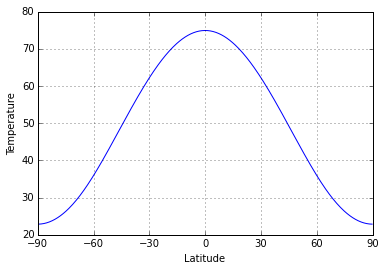

In [25]:
model4.subprocess['insolation'].S0 = 1840.
model4.integrate_years(10)

plt.plot(model4.lat, model4.state['Ts'])
plt.xlim(-90,90)
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.grid()
plt.xticks(my_ticks)
plt.show()

Suddenly the climate looks very very different again! The global mean temperature is

In [26]:
print( model4.global_mean_temperature() )

57.7335544708


A roasty 58ºC, and the poles are above 20ºC. A tiny increase in $S_0$ has led to a very drastic change in the climate.

In [27]:
S0array_snowballmelt = np.linspace(1400., 1900., 50)
icelat_snowballmelt = np.empty_like(S0array_snowballmelt)
icelat_snowballmelt_cooling = np.empty_like(S0array_snowballmelt)

for n in range(S0array_snowballmelt.size):
    model2.subprocess['insolation'].S0 = S0array_snowballmelt[n]
    model2.integrate_years(10, verbose=False)
    icelat_snowballmelt[n] = np.max(model2.diagnostics['icelat'])
    
for n in range(S0array_snowballmelt.size):
    model2.subprocess['insolation'].S0 = np.flipud(S0array_snowballmelt)[n]
    model2.integrate_years(10, verbose=False)
    icelat_snowballmelt_cooling[n] = np.max(model2.diagnostics['icelat'])

Now we will complete the plot of ice edge versus solar constant.

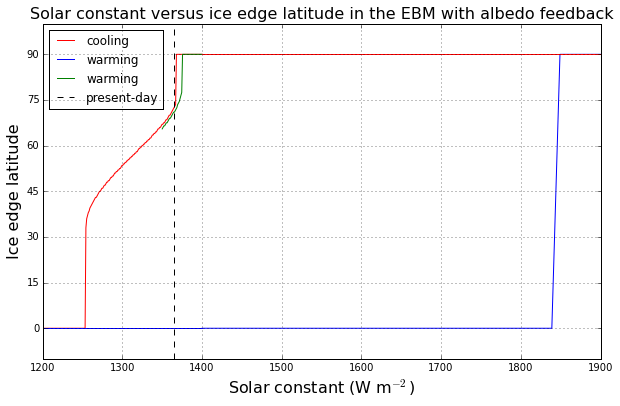

In [28]:
fig = plt.figure( figsize=(10,6) )
ax = fig.add_subplot(111)
ax.plot(S0array, icelat_cooling, 'r-', label='cooling' )
ax.plot(S0array, icelat_warming, 'b-', label='warming' )
ax.plot(S0array3, icelat3, 'g-', label='warming' )
ax.plot(S0array_snowballmelt, icelat_snowballmelt, 'b-' )
ax.plot(S0array_snowballmelt, icelat_snowballmelt_cooling, 'r-' )
ax.set_ylim(-10,100)
ax.set_yticks((0,15,30,45,60,75,90))
ax.grid()
ax.set_ylabel('Ice edge latitude', fontsize=16)
ax.set_xlabel('Solar constant (W m$^{-2}$)', fontsize=16)
ax.plot( [const.S0, const.S0], [-10, 100], 'k--', label='present-day' )
ax.legend(loc='upper left')
ax.set_title('Solar constant versus ice edge latitude in the EBM with albedo feedback', fontsize=16)
plt.show()

The upshot:

- For extremely large $S_0$, the only possible climate is a hot Earth with no ice.
- For extremely small $S_0$, the only possible climate is a cold Earth completely covered in ice.
- For a large range of $S_0$ including the present-day value, more than one climate is possible!
- Once we get into a Snowball Earth state, getting out again is rather difficult!

<div class="alert alert-success">
[Back to ATM 623 notebook home](../index.ipynb)
</div>

____________
## Credits

The author of this notebook is [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It was developed in support of [ATM 623: Climate Modeling](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/), a graduate-level course in the [Department of Atmospheric and Envionmental Sciences](http://www.albany.edu/atmos/index.php), offered in Spring 2015.
____________

____________
## Version information
____________


In [ ]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, climlab